In [1]:
#decision tree implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("irisdata.csv")
df.head()

,slength,swidth,plength,pwidth,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.class_label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.columns

Index(['slength', 'swidth', 'plength', 'pwidth', 'class_label'], dtype='object')

In [5]:
X=df.iloc[:,0:4]
X[0:5]

,slength,swidth,plength,pwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y=df.iloc[:,4]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class_label, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print("train-set :",X_train.shape,y_train.shape)
print("test-set :",X_test.shape,y_test.shape)

train-set : (120, 4) (120,)
test-set : (30, 4) (30,)


In [9]:
from sklearn.tree import DecisionTreeClassifier
irisTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
irisTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
irisTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predTree=irisTree.predict(X_test)

In [12]:
print(predTree[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: class_label, dtype: object


In [13]:
from sklearn import metrics
print("DecisionTree Accuracy: ",metrics.accuracy_score(y_test,predTree))

DecisionTree Accuracy:  0.9333333333333333


In [14]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

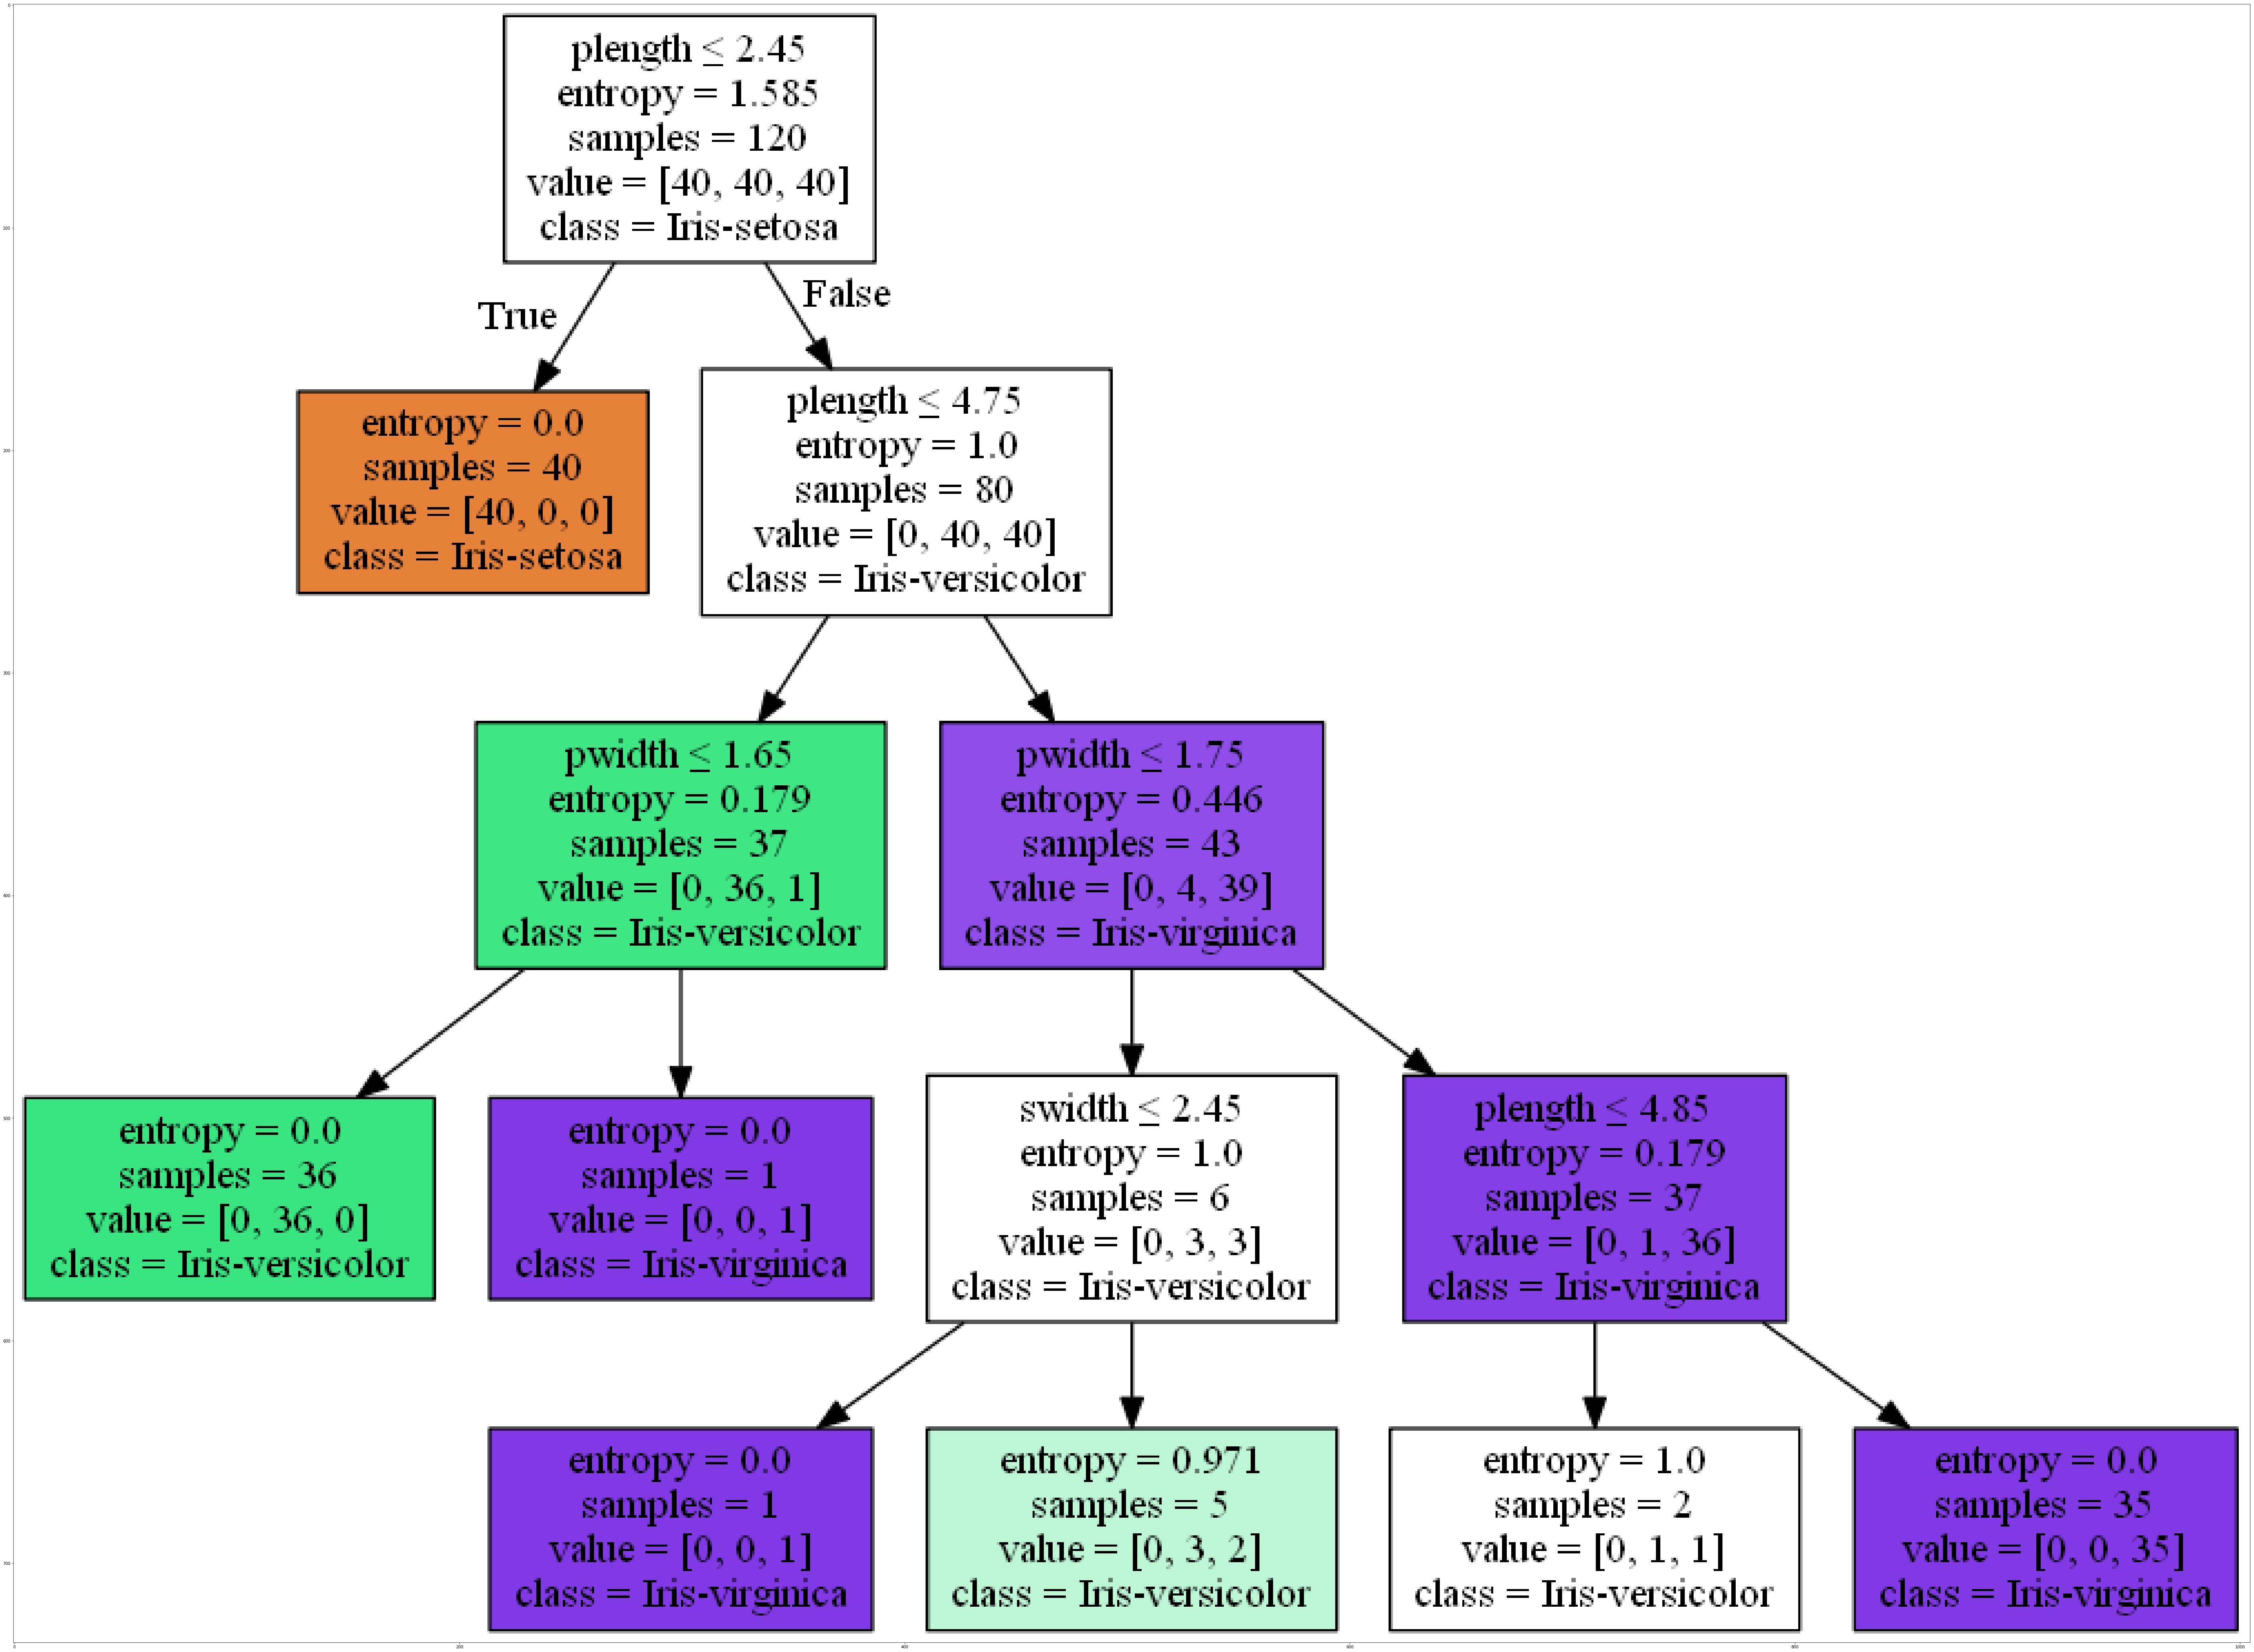

In [15]:
dot_data = StringIO()
filename = "iristree.png"
featureNames = df.columns[0:4]
targetNames = df["class_label"].unique().tolist()
out=tree.export_graphviz(irisTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_test), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')